## Student pass/fail prediction using logistic regression

### Step 1: Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### set random seed for reproducibility

In [2]:
np.random.seed(42)

### step 2: Generate synthetic student data

In [3]:
n_students = 200
study_hours = np.random.uniform(0, 10, n_students)
attendence = np.random.uniform(40, 100, n_students)

In [4]:
# attendence

### Calculate the combined score to determine pass/fail

In [5]:
combined_score = 0.6 * study_hours + 0.4 * (attendence/10)

### Add some randomness

In [6]:
random_factor = np.random.normal(0, 1, n_students)

In [7]:
random_factor

array([ 1.30547881,  0.02100384,  0.68195297, -0.31026676,  0.32416635,
       -0.13014305,  0.09699596,  0.59515703, -0.81822068,  2.09238728,
       -1.00601738, -1.21418861,  1.15811087,  0.79166269,  0.62411982,
        0.62834551, -0.01224677, -0.89725437,  0.07580456, -0.67716171,
        0.97511973, -0.14705738, -0.8254972 , -0.32138584,  0.41293145,
       -0.56372455, -0.8222204 ,  0.24368721,  0.24496657, -0.50694318,
       -0.47103831,  0.23204994, -1.44808434, -1.40746377, -0.71844422,
       -0.21344715,  0.31090757,  1.47535622,  0.85765962, -0.15993853,
       -0.01901621, -1.00252936, -0.01851314, -0.28865864,  0.32271856,
       -0.82723094,  0.51934651,  1.53273891, -0.10876015,  0.40171172,
        0.69014399, -0.40122047,  0.22409248,  0.0125924 ,  0.0976761 ,
       -0.77300978,  0.02451017,  0.49799829,  1.45114361,  0.95927083,
        2.15318246, -0.76734756,  0.87232064,  0.18334201,  2.18980293,
       -0.80829829, -0.83972184, -0.59939265, -2.12389572, -0.52

### Calculate the combined score with noise

In [8]:
final_combined_score = combined_score + random_factor

In [9]:
final_combined_score

array([ 6.69359547,  7.5272256 ,  7.06182554,  7.0382142 ,  4.31570794,
        2.42789699,  2.28902934,  8.98461815,  4.40061719,  8.32676207,
        2.03445068,  7.86581897,  9.31747374,  4.2039437 ,  5.02429975,
        3.89817038,  4.19416596,  5.64286359,  5.82659363,  4.70834931,
        7.82450804,  3.65384643,  2.75219014,  4.35930315,  5.38583704,
        6.33290636,  4.31104763,  5.87252838,  7.54036572,  2.886492  ,
        6.68177793,  4.0615237 ,  1.92679454,  7.06789191,  7.14393115,
        7.97082201,  4.41244385,  3.71974722,  8.11219129,  4.50604206,
        4.5703138 ,  5.85796068,  3.98349253,  7.65564465,  3.51249433,
        6.97586731,  5.01725493,  8.57311861,  7.08418947,  5.15806115,
        8.8143291 ,  6.77381102,  9.50381414,  7.74216932,  5.69185856,
        7.69455866,  4.40223664,  4.94436698,  4.69065415,  4.7444764 ,
        7.56126354,  4.83687587,  7.78094733,  5.16785313,  7.58110536,
        5.8257229 ,  3.27866129,  7.49975104,  0.7861869 ,  7.70

### Determine pass/ fail

In [10]:
pass_fail = (final_combined_score > 5.0).astype(int)

In [11]:
pass_fail

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

### Create a dataframe

In [12]:
students = pd.DataFrame({
    "Study_Hours": study_hours,
    "Attendence": attendence,
    "Result": ["Pass" if x == 1 else "Fail" for x in pass_fail],
    "ResultNumeric": pass_fail
})

In [13]:
students.head(10)

,Study_Hours,Attendence,Result,ResultNumeric
0,3.745401,78.521899,Pass,1
1,9.507143,45.048398,Pass,1
2,7.319939,49.697723,Pass,1
3,5.986585,93.913251,Pass,1
4,1.560186,76.385744,Fail,0
5,1.559945,40.551823,Fail,0
6,0.580836,46.088293,Fail,0
7,8.661761,79.810106,Pass,1
8,6.011150,40.303695,Fail,0
9,7.080726,49.648483,Pass,1


### Calculate the number of pass / fail

In [34]:
print(f"Passed students: {np.sum(pass_fail)}")
print(f"Failed students: {len(pass_fail) - np.sum(pass_fail)}")

Passed students: 123
Failed students: 77


### Visualize the classification data

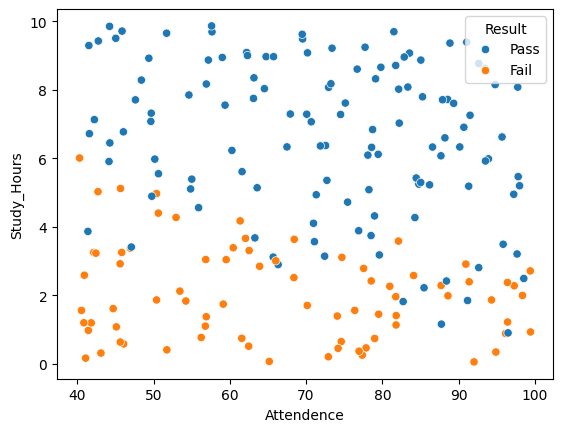

In [15]:
sns.scatterplot(data = students, x = "Attendence", y = "Study_Hours", hue = "Result")
plt.show()

### prepare the features and target

In [16]:
X = students[['Study_Hours', "Attendence"]].values
y = students["ResultNumeric"].values

### Split the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Check the shapes after splitting

In [18]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (160, 2)
X_test: (40, 2)
y_train: (160,)
y_test: (40,)


In [19]:
students.head()

,Study_Hours,Attendence,Result,ResultNumeric
0,3.745401,78.521899,Pass,1
1,9.507143,45.048398,Pass,1
2,7.319939,49.697723,Pass,1
3,5.986585,93.913251,Pass,1
4,1.560186,76.385744,Fail,0


### Feature scaling for logistic regression

In [36]:
X_train

array([[7.25955679e+00, 9.15047651e+01],
       [4.56069984e+00, 5.59121421e+01],
       [4.52272889e-01, 7.42036702e+01],
       [5.97899979e+00, 5.01695648e+01],
       [9.50714306e+00, 4.50483979e+01],
       [5.98658484e+00, 9.39132513e+01],
       [6.01115012e+00, 4.03036950e+01],
       [2.80934510e+00, 9.26423843e+01],
       [4.40152494e+00, 5.06266408e+01],
       [6.23298127e+00, 6.02797094e+01],
       [6.33101457e+00, 8.65847776e+01],
       [1.83404510e+00, 5.42349452e+01],
       [8.77339353e+00, 9.26483208e+01],
       [6.77564362e+00, 4.60466801e+01],
       [3.49209575e+00, 9.58454395e+01],
       [2.91229140e+00, 9.09534046e+01],
       [9.31027678e-01, 9.94303085e+01],
       [3.14355981e+00, 7.24381073e+01],
       [6.95213053e-02, 6.51760037e+01],
       [8.15461428e+00, 9.47944332e+01],
       [3.68869474e-01, 7.69510059e+01],
       [5.12093058e+00, 4.56665776e+01],
       [3.86735346e+00, 4.13963161e+01],
       [5.39342242e+00, 5.50145739e+01],
       [7.616196

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[ 0.82023405,  1.19262158],
       [-0.10473212, -0.81631231],
       [-1.5127934 ,  0.21610586],
       [ 0.38135495, -1.14043729],
       [ 1.59053842, -1.42948836],
       [ 0.38395454,  1.32856238],
       [ 0.39237368, -1.69729088],
       [-0.70496545,  1.25683157],
       [-0.15928537, -1.11463881],
       [ 0.4684008 , -0.56979623],
       [ 0.50199928,  0.91492557],
       [-1.0392253 , -0.91097736],
       [ 1.33906399,  1.25716664],
       [ 0.65438484, -1.37314289],
       [-0.47096963,  1.43761977],
       [-0.66968317,  1.16150146],
       [-1.34871209,  1.63995846],
       [-0.59042166,  0.11645321],
       [-1.643972  , -0.29343751],
       [ 1.12699278,  1.37829842],
       [-1.54137785,  0.37117215],
       [ 0.08727305, -1.39459679],
       [-0.34235937, -1.6356207 ],
       [ 0.18066286, -0.86697323],
       [ 0.94246334,  0.26932343],
       [-0.80487743, -0.11099852],
       [ 0.77667063, -1.58795083],
       [-1.41229489, -0.49699906],
       [ 0.97553882,

### Create and train logistic regression model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Train the created model

In [23]:
print("Model training starting...")
model.fit(X_train_scaled, y_train)

Model training starting...


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Extract the learned parameters (slope and intercepts)

In [24]:
coefficients = np.round(model.coef_[0], 3)
intercepts = np.round(model.intercept_, 3)

### Display the learned parameters

In [25]:
print(f"Coefficient of study_hours: {coefficients[0]}")
print(f"Coefficient of attendences: {coefficients[1]}")
print(f"Intecept: {intercepts[0]}")

print(f"Equation: study_hours * {coefficients[0]} + attendence * {coefficients[1]} + {intercepts[0]}")

Coefficient of study_hours: 3.022
Coefficient of attendences: 0.742
Intecept: 1.255
Equation: study_hours * 3.022 + attendence * 0.742 + 1.255


### make prediction on test dataset

In [26]:
y_pred = model.predict(X_test_scaled)

In [27]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [28]:
check = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
check

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,0
9,0,0


### Evaluate the model (check accuracy and confusion matrix)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy of the model is {accuracy * 100}%")


Accuracy of the model is 90.0%


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[14  1]
 [ 3 22]]


### Visualize the confusion matrix

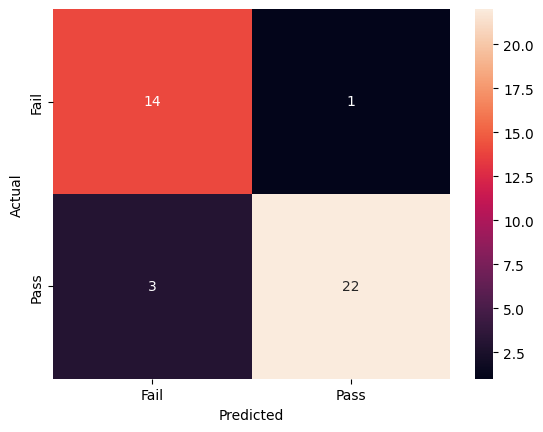

In [31]:
sns.heatmap(data = conf_matrix, annot = True, xticklabels = ['Fail', 'Pass'], yticklabels = ['Fail', "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Predict on new data 

## Deployement

### Save the trained model

In [32]:
import joblib

joblib.dump(model, "classification_model.pkl")

['classification_model.pkl']

### Save the trained scaler

In [33]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']